# Modelling NIQS Hardware pyTorch

In [1]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import torch.optim as optim

from qiskit.quantum_info import DensityMatrix
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm


from src_torch import *

torch.set_printoptions(precision=8)

## Test

In [2]:
n = 3
d = 2**n

state_input_list = [prepare_input(numberToBase(i, 6, n)) for i in range(6**n)]

np.random.seed(42)
torch.manual_seed(42)

X_target = generate_ginibre(d**2, 2)

choi_target = generate_choi(X_target)

state_target_list = [apply_map(state_input, choi_target) for state_input in state_input_list]


X = generate_ginibre(d**2, 2).requires_grad_()
optimizer = optim.SGD([X], lr=0.1)

fid_list = []

for i in tqdm(range(1000)):
    optimizer.zero_grad()
    
    choi_model = generate_choi(X)
    index = np.random.randint(0, len(state_input_list)-1)
    state_input = state_input_list[index]
    state_target = state_target_list[index]
    
    state_model = apply_map(state_input, choi_model)
    loss = -state_fidelity(state_model, state_target)
    loss.backward()
    optimizer.step()
    fid = np.abs(loss.detach().numpy())
    fid_list.append(fid)
    print(f"step: {i}, fid: {fid:.4f}")

step: 0, fid: 0.5261
step: 1, fid: 0.7908
step: 2, fid: 0.4147
step: 3, fid: 0.6005
step: 4, fid: 0.6643
step: 5, fid: 0.7024
step: 6, fid: 0.3879
step: 7, fid: 0.6091
step: 8, fid: 0.5377
step: 9, fid: 0.7373
step: 10, fid: 0.5784
step: 11, fid: 0.7070
step: 12, fid: 0.5980
step: 13, fid: 0.7807
step: 14, fid: 0.7466
step: 15, fid: 1.2131
step: 16, fid: 0.4852
step: 17, fid: 0.7537
step: 18, fid: 0.6065
step: 19, fid: 0.9516
step: 20, fid: 0.6254
step: 21, fid: 0.8864
step: 22, fid: 0.5328
step: 23, fid: 0.5142
step: 24, fid: 0.6470
step: 25, fid: 0.7865
step: 26, fid: 0.5556
step: 27, fid: 0.4153
step: 28, fid: 0.4857
step: 29, fid: 0.6423
step: 30, fid: 1.0091
step: 31, fid: 0.8438
step: 32, fid: 0.4425
step: 33, fid: 0.5116
step: 34, fid: 0.9411
step: 35, fid: 0.7619
step: 36, fid: 1.0271
step: 37, fid: 1.0373
step: 38, fid: 0.5918
step: 39, fid: 0.6146
step: 40, fid: 0.7330
step: 41, fid: 0.4505
step: 42, fid: 0.8948
step: 43, fid: 0.5311
step: 44, fid: 0.3897
step: 45, fid: 0.506

step: 362, fid: 3.9734
step: 363, fid: 7.5188
step: 364, fid: 3.4141
step: 365, fid: 2.8801
step: 366, fid: 5.2718
step: 367, fid: 3.3484
step: 368, fid: 5.8597
step: 369, fid: 10.1703
step: 370, fid: 12.8962
step: 371, fid: 13.6254
step: 372, fid: 45.1377
step: 373, fid: 1.3599
step: 374, fid: 2.2340
step: 375, fid: 2.8146
step: 376, fid: 0.4334
step: 377, fid: 1.0752
step: 378, fid: 1.0719
step: 379, fid: 2.4504
step: 380, fid: 0.8068
step: 381, fid: 3.0035
step: 382, fid: 1.6186
step: 383, fid: 3.3781
step: 384, fid: 3.2189
step: 385, fid: 3.4544
step: 386, fid: 1.8407
step: 387, fid: 3.3587
step: 388, fid: 1.0737
step: 389, fid: 2.0298
step: 390, fid: 1.8974
step: 391, fid: 1.4594
step: 392, fid: 2.0673
step: 393, fid: 1.0767
step: 394, fid: 2.2138
step: 395, fid: 0.9511
step: 396, fid: 0.4169
step: 397, fid: 1.3096
step: 398, fid: 0.8173
step: 399, fid: 0.6526
step: 400, fid: 2.0155
step: 401, fid: 1.6847
step: 402, fid: 2.4700
step: 403, fid: 1.6078
step: 404, fid: 0.8006
step: 4

step: 804, fid: 4.1320
step: 805, fid: 6.3902
step: 806, fid: 2.8560
step: 807, fid: 3.0651
step: 808, fid: 1.5966
step: 809, fid: 1.3959
step: 810, fid: 3.7345
step: 811, fid: 5.9086
step: 812, fid: 2.0733
step: 813, fid: 2.2657
step: 814, fid: 3.1982
step: 815, fid: 1.7669
step: 816, fid: 4.4360
step: 817, fid: 7.5143
step: 818, fid: 3.9325
step: 819, fid: 4.3109
step: 820, fid: 8.8118
step: 821, fid: 3.4123
step: 822, fid: 4.3512
step: 823, fid: 1.4024
step: 824, fid: 4.3404
step: 825, fid: 3.2364
step: 826, fid: 3.8004
step: 827, fid: 2.1462
step: 828, fid: 8.8941
step: 829, fid: 5.0106
step: 830, fid: 1.7455
step: 831, fid: 7.0352
step: 832, fid: 6.6652
step: 833, fid: 9.5167
step: 834, fid: 2.0731
step: 835, fid: 5.7947
step: 836, fid: 2.2300
step: 837, fid: 3.1223
step: 838, fid: 1.3165
step: 839, fid: 3.9238
step: 840, fid: 5.4934
step: 841, fid: 3.1219
step: 842, fid: 10.1835
step: 843, fid: 4.9977
step: 844, fid: 4.4969
step: 845, fid: 6.1017
step: 846, fid: 5.3404
step: 847,

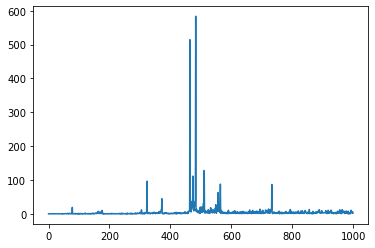

In [3]:
plt.plot(fid_list)

In [44]:
print(choi_model)
print(choi_target)

tensor([[ 0.01524543-1.73472348e-18j,  0.03693582-2.51190575e-02j,
          0.00408587-5.45940330e-03j,  ...,
          0.02544855+1.34757259e-02j, -0.02804881-1.24228893e-02j,
         -0.02219042-2.10357432e-02j],
        [ 0.03693582+2.51190575e-02j,  0.15738826+4.16333634e-17j,
          0.00290300-4.51553097e-03j,  ...,
         -0.02020502+5.30398546e-02j, -0.04974882-5.68629439e-02j,
         -0.00062319-6.66393880e-02j],
        [ 0.00408587+5.45940330e-03j,  0.00290300+4.51553097e-03j,
          0.01284213+1.73472348e-18j,  ...,
          0.03636647+3.01677687e-02j, -0.00025254-2.49346618e-02j,
         -0.00800003-2.75604070e-02j],
        ...,
        [ 0.02544855-1.34757259e-02j, -0.02020502-5.30398546e-02j,
          0.03636647-3.01677687e-02j,  ...,
          0.20611412+5.20417043e-18j, -0.06851066-4.15412924e-02j,
         -0.11417961-4.74830019e-02j],
        [-0.02804881+1.24228893e-02j, -0.04974882+5.68629439e-02j,
         -0.00025254+2.49346618e-02j,  ...,
        

In [ ]:
A = state_input_list[15]
print(A)

L, V = torch.linalg.eigh(A)
L = torch.sqrt(L.type(torch.complex64))

B = torch.zeros_like(A)
for l, v in zip(L, V.T):
    B += l*torch.conj(v.reshape(-1,1))@v.reshape(1,-1)

print(A, B@B)

In [30]:
n = 2
d = 2**n

np.random.seed(42)
X = generate_ginibre(d**2, 2)
print(X)

tensor([[ 0.49671415-0.01349722j, -0.13826430-1.05771093j],
        [ 0.64768854+0.82254491j,  1.52302986-1.22084365j],
        [-0.23415337+0.20886360j, -0.23413696-1.95967012j],
        [ 1.57921282-1.32818605j,  0.76743473+0.19686124j],
        [-0.46947439+0.73846658j,  0.54256004+0.17136828j],
        [-0.46341769-0.11564828j, -0.46572975-0.30110370j],
        [ 0.24196227-1.47852199j, -1.91328024-0.71984421j],
        [-1.72491783-0.46063877j, -0.56228753+1.05712223j],
        [-1.01283112+0.34361829j,  0.31424733-1.76304016j],
        [-0.90802408+0.32408397j, -1.41230370-0.38508228j],
        [ 1.46564877-0.67692200j, -0.22577630+0.61167629j],
        [ 0.06752820+1.03099952j, -1.42474819+0.93128012j],
        [-0.54438272-0.83921752j,  0.11092259-0.30921238j],
        [-1.15099358+0.33126343j,  0.37569802+0.97554513j],
        [-0.60063869-0.47917424j, -0.29169375-0.18565898j],
        [-0.60170661-1.10633497j,  1.85227818-1.19620662j]],
       dtype=torch.complex128)


In [31]:
XX = X@X.T.conj()
print(XX)

tensor([[ 1.38477655+0.00000000e+00j,  1.39133300-2.19703612e+00j,
          1.98601092-1.23888285e-01j,  0.48801307-1.46091401e-01j,
         -0.49943661-9.10647773e-01j,  0.15424927+5.14674550e-01j,
          1.16606747+2.65530565e+00j, -1.89095919+9.92987331e-01j,
          1.31361221-7.33158012e-01j,  0.14717428+1.29184464e+00j,
          0.12138516+6.39833602e-01j, -0.76840676+1.12271102e+00j,
          0.05264518+2.64121809e-01j, -1.65997630-4.11504850e-01j,
         -0.05517385+5.28977239e-01j,  0.72519313-1.56691394e+00j],
        [ 1.39133300+2.19703612e+00j,  4.90615974+0.00000000e+00j,
          2.05599448+2.94260050e+00j,  0.85883458+9.22480991e-01j,
          0.92047002-1.78784010e+00j, -0.73699602+7.20895332e-01j,
         -3.09460026+4.58880684e+00j, -3.64306724-2.04403549e+00j,
          2.25764682+1.24585922e+00j, -2.00239861+1.35389776e+00j,
         -0.69814000+9.88032871e-01j, -2.41510079-2.91194242e-01j,
         -0.49644617+4.31292872e-01j, -1.09179507-3.10575233e

In [ ]:
[[ 0.78061957+0.j          0.07601179+0.68805429j -1.23559901-0.40182879j
   1.18303852+0.45402626j]
 [ 0.07601179-0.68805429j  3.17078055+0.j          0.27068591+2.97482211j
   3.25289552+0.88433786j]
 [-1.23559901+0.40182879j  0.27068591-2.97482211j  3.82883495+0.j
   0.10898574-1.62175541j]
 [ 1.18303852-0.45402626j  3.25289552-0.88433786j  0.10898574+1.62175541j
   6.37437797+0.j        ]]

In [32]:
Y = partial_trace(XX)
print(Y)

tensor([[ 7.93377123+0.00000000j,  2.57394816+1.03908249j,
         -2.49310668-0.19879975j,  0.86135778+0.44324618j],
        [ 2.57394816-1.03908249j, 11.04164508+0.00000000j,
          1.99765867+2.31612974j,  3.43642140+5.17577515j],
        [-2.49310668+0.19879975j,  1.99765867-2.31612974j,
         14.15837072+0.00000000j,  0.23160092+0.36310948j],
        [ 0.86135778-0.44324618j,  3.43642140-5.17577515j,
          0.23160092-0.36310948j, 19.91948879+0.00000000j]],
       dtype=torch.complex128)


In [33]:
Y = square_root_inverse(Y)
print(Y)

tensor([[ 0.38304621-1.04834151e-17j, -0.06244681+1.99506238e-02j,
          0.04460696-1.37097699e-02j, -0.00584848-1.06625052e-02j],
        [-0.06244681-1.99506238e-02j,  0.35163386-2.60208521e-18j,
         -0.03657046+3.11896339e-02j, -0.03499307+5.52832084e-02j],
        [ 0.04460696+1.37097699e-02j, -0.03657046-3.11896339e-02j,
          0.28035946+1.35849101e-18j,  0.00830998-4.36286429e-04j],
        [-0.00584848+1.06625052e-02j, -0.03499307-5.52832084e-02j,
          0.00830998+4.36286429e-04j,  0.24045567+6.45406747e-18j]],
       dtype=torch.complex128)


In [ ]:
0.46982564+1.52046633e-19j
-0.00539533+2.72307567e-02j
-0.00539533-2.72307567e-02j
0.3258792 -1.16520961e-17j

In [34]:
I = torch.eye(d).type(torch.complex128)
Ykron = torch.kron(I, Y).T
print(Ykron)

tensor([[ 0.38304621-1.04834151e-17j, -0.06244681-1.99506238e-02j,
          0.04460696+1.37097699e-02j, -0.00584848+1.06625052e-02j,
          0.00000000+0.00000000e+00j,  0.00000000-0.00000000e+00j,
          0.00000000+0.00000000e+00j, -0.00000000+0.00000000e+00j,
          0.00000000+0.00000000e+00j,  0.00000000-0.00000000e+00j,
          0.00000000+0.00000000e+00j, -0.00000000+0.00000000e+00j,
          0.00000000+0.00000000e+00j,  0.00000000-0.00000000e+00j,
          0.00000000+0.00000000e+00j, -0.00000000+0.00000000e+00j],
        [-0.06244681+1.99506238e-02j,  0.35163386-2.60208521e-18j,
         -0.03657046-3.11896339e-02j, -0.03499307-5.52832084e-02j,
         -0.00000000+0.00000000e+00j,  0.00000000+0.00000000e+00j,
          0.00000000-0.00000000e+00j,  0.00000000-0.00000000e+00j,
         -0.00000000+0.00000000e+00j,  0.00000000+0.00000000e+00j,
          0.00000000-0.00000000e+00j,  0.00000000-0.00000000e+00j,
         -0.00000000+0.00000000e+00j,  0.00000000+0.00000000e

In [35]:
choi = Ykron@XX@Ykron
print(torch.trace(choi))

tensor(4.00000000+2.61834825e-17j, dtype=torch.complex128)
